## Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Task 4.10 Part 1

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Python\04-2024 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Python\\04-2024 Instacart Basket Analysis'

In [4]:
# Import ords_prods_merge_updated.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [5]:
# Checking the shape of ords_prods_merge
ords_prods_merge.shape

(32404289, 32)

In [6]:
# checking the output of ords_prods_merge
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
#Checking for all columns of ords_prods_merge
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_day_of_week       int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  busiest_day             object  
 14  busiest_day_new         object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  avg_spending            float64 
 19  Spender_status          object  
 20  median_order_days       float64 
 21  order_

In [8]:
# Dropping _merge columns as it not useful for analysis
ords_prods_merge = ords_prods_merge.drop(columns = ['_merge'])

In [9]:
#Checking for if columns '_merge' is dropped
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_day_of_week       int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  busiest_day             object 
 14  busiest_day_new         object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  avg_spending            float64
 19  Spender_status          object 
 20  median_order_days       float64
 21  order_frequency         objec

## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [10]:
# Dropping 'first_name' and 'last_name' columns as it contains PII data
ords_prods_merge = ords_prods_merge.drop(columns = ['first_name', 'last_name'])

In [11]:
# Checking for if columns 'first_name' and 'last_name' is dropped
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_day_of_week       int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  busiest_day             object 
 14  busiest_day_new         object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  avg_spending            float64
 19  Spender_status          object 
 20  median_order_days       float64
 21  order_frequency         objec

In [12]:
# Checking output
ords_prods_merge.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spender_status,median_order_days,order_frequency,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
# Checking for all the values in 'state' columns
ords_prods_merge['state'].value_counts().sort_index()

state
Alabama                 637987
Alaska                  648491
Arizona                 653947
Arkansas                636140
California              659774
Colorado                639270
Connecticut             623010
Delaware                637012
District of Columbia    613690
Florida                 629025
Georgia                 656381
Hawaii                  632894
Idaho                   607105
Illinois                633011
Indiana                 627270
Iowa                    625484
Kansas                  637527
Kentucky                632487
Louisiana               637474
Maine                   638571
Maryland                626567
Massachusetts           646355
Michigan                630923
Minnesota               647808
Mississippi             632656
Missouri                640719
Montana                 635253
Nebraska                625792
Nevada                  636128
New Hampshire           615372
New Jersey              627668
New Mexico              654486
Ne

In [14]:
# Creating list for states in 'north_east' region
north_east = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [15]:
# Creating list for states in 'mid_west' region
mid_west = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [16]:
# Creating list for states in 'south' region
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [17]:
# Creating list for states in 'west' region
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [18]:
# Set region to 'north_east' if state is in 'north_east' list
ords_prods_merge.loc[ords_prods_merge['state'].isin(north_east), 'region'] = 'north_east'

In [19]:
# Set region to 'mid_west' if state is in 'mid_west' list
ords_prods_merge.loc[ords_prods_merge['state'].isin(mid_west), 'region'] = 'mid_west'

In [20]:
# Set region to 'south' if state is in 'south' list
ords_prods_merge.loc[ords_prods_merge['state'].isin(south), 'region'] = 'south'

In [21]:
# Set region to 'west' if state is in 'west' list
ords_prods_merge.loc[ords_prods_merge['state'].isin(west), 'region'] = 'west'

In [22]:
# Check total count of states columns
ords_prods_merge['state'].count()

32404289

In [23]:
# Check total count of region columns
ords_prods_merge['region'].count()

32404289

In [24]:
# Check if all values have been assigned a region
ords_prods_merge['region'].value_counts()

region
south         10791699
west           8292777
mid_west       7597170
north_east     5722643
Name: count, dtype: int64

In [25]:
# Create crosstab between 'region' and 'Spender_status'
region_spenderstatus = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['Spender_status'], dropna = False)

In [26]:
# View crosstab table
region_spenderstatus

Spender_status,High spender,Low spender
region,,
mid_west,155970,7441200
north_east,108222,5614421
south,209682,10582017
west,160353,8132424


In [27]:
# Creating a column which shows the percentage of high spender vs total
region_spenderstatus['percent_high'] = region_spenderstatus['High spender'] / (region_spenderstatus['High spender'] + region_spenderstatus['Low spender']) * 100

In [28]:
# Creating a column which shows the percentage of low spender vs total
region_spenderstatus['percent_low'] = region_spenderstatus['Low spender'] / (region_spenderstatus['High spender'] + region_spenderstatus['Low spender']) * 100

In [29]:
region_spenderstatus

Spender_status,High spender,Low spender,percent_high,percent_low
region,,,,
mid_west,155970,7441200,2.053001,97.946999
north_east,108222,5614421,1.891119,98.108881
south,209682,10582017,1.942993,98.057007
west,160353,8132424,1.933647,98.066353


#### From the crosstab table, we can see that the spending habits do not vary significantly across regions as the high spender of all regions contributes to around ~2% of the overall spender, and the low spender contributes to around ~98% of the overall spenders.

## 4.  The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [30]:
# If cusomter have order_number < 5, assign 'low activity'
ords_prods_merge.loc[ords_prods_merge['order_number'] < 5, 'activity_flag'] = 'low activity'

In [31]:
# If cusomter have order_number >= 5, assign 'high activity'
ords_prods_merge.loc[ords_prods_merge['order_number'] >= 5, 'activity_flag'] = 'high activity'

In [32]:
# Check total count of 'activity_flag' columns
ords_prods_merge['activity_flag'].count()

32404289

In [33]:
# Check if all values have been assigned a 'activity_flag'
ords_prods_merge['activity_flag'].value_counts()

activity_flag
high activity    24414473
low activity      7989816
Name: count, dtype: int64

In [34]:
# Create a df which contains only customer with 'high activity' in 'activity_flag' column
df_high_activity_cust = ords_prods_merge[ords_prods_merge['activity_flag'] == 'high activity']

In [35]:
# Checking the shape of df_high_activity_cust
df_high_activity_cust.shape

(24414473, 31)

In [36]:
# Checking the output of df_high_activity_cust
df_high_activity_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity_flag
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,high activity
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,high activity
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,high activity
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,high activity
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,high activity


In [78]:
# Export df_high_activity_cust as pickle file
df_high_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [37]:
# Create an age category - young adults is Age <= 35
ords_prods_merge.loc[ords_prods_merge['age'] <= 35, 'age_group'] = 'young adults'

In [38]:
# Create an age category - middle-age adults is Age > 35 and < 60
ords_prods_merge.loc[(ords_prods_merge['age'] > 35) & (ords_prods_merge['age'] < 60) , 'age_group'] = 'middle-age'

In [39]:
# Create an age category - senior is Age >= 60
ords_prods_merge.loc[ords_prods_merge['age'] >= 60 , 'age_group'] = 'senior'

In [40]:
# Check total count of 'age_group' columns
ords_prods_merge['age_group'].count()

32404289

In [41]:
# Check if all values have been assigned a 'age_group'
ords_prods_merge['age_group'].value_counts()

age_group
middle-age      12190997
senior          11067041
young adults     9146251
Name: count, dtype: int64

In [42]:
# Checking statistic for income
ords_prods_merge['income'].describe()

count    3.240429e+07
mean     9.943766e+04
std      4.305706e+04
min      2.590300e+04
25%      6.700300e+04
50%      9.661700e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [43]:
# Create an income category - 'low income' <= 67000
ords_prods_merge.loc[ords_prods_merge['income'] <= 67000, 'income_group'] = 'low income'

In [44]:
# Create an income category - 'middle-low income' is > 67000 and <= 96000
ords_prods_merge.loc[(ords_prods_merge['income'] > 67000) & (ords_prods_merge['income'] <= 96000), 'income_group'] = 'middle-low income'

In [45]:
# Create an income category - 'middle-high income' is > 67000 and < 127000
ords_prods_merge.loc[(ords_prods_merge['income'] > 96000) & (ords_prods_merge['income'] < 127000), 'income_group'] = 'middle-high income'

In [46]:
# Create an income category - 'high income' >= 127000
ords_prods_merge.loc[ords_prods_merge['income'] >= 127000, 'income_group'] = 'high income'

In [47]:
# Check total count of 'income_group' columns
ords_prods_merge['income_group'].count()

32404289

In [48]:
# Check if all values have been assigned a 'income_group'
ords_prods_merge['income_group'].value_counts()

income_group
high income           8268892
middle-high income    8200231
low income            8100663
middle-low income     7834503
Name: count, dtype: int64

In [49]:
# Create an dependants_flag - no_of_dependants > 0 = 'family'
ords_prods_merge.loc[ords_prods_merge['no_of_dependants'] > 0, 'dependants_flag'] = 'family'

In [50]:
# Create an dependants_flag - no_of_dependants = 0 = 'alone'
ords_prods_merge.loc[ords_prods_merge['no_of_dependants'] == 0, 'dependants_flag'] = 'alone'

In [51]:
# Check total count of 'dependants_flag' columns
ords_prods_merge['dependants_flag'].count()

32404289

In [52]:
# Check if all values have been assigned a 'dependants_flag'
ords_prods_merge['dependants_flag'].value_counts()

dependants_flag
family    24306889
alone      8097400
Name: count, dtype: int64

In [53]:
# Create an produce_flag - department_id = 4
ords_prods_merge.loc[ords_prods_merge['department_id'] == 4, 'produce_flag'] = 'yes'

In [54]:
# Create an produce_flag - department_id != 4
ords_prods_merge.loc[ords_prods_merge['department_id'] != 4, 'produce_flag'] = 'no'

In [55]:
# Check total count of 'produce_flag' columns
ords_prods_merge['produce_flag'].count()

32404289

In [56]:
# Check if all values have been assigned a 'produce_flag'
ords_prods_merge['produce_flag'].value_counts()

produce_flag
no     22924998
yes     9479291
Name: count, dtype: int64

## 6. Create an appropriate visualization to show the distribution of profiles.

In [57]:
# Create subset with just user_id and age_group, dropping duplicate user_id
df_age_group = ords_prods_merge[['user_id', 'age_group']].drop_duplicates(subset = 'user_id')

In [58]:
# Create table for value_counts of age_group
age_group_count = df_age_group['age_group'].value_counts()

In [59]:
# Show value count of age_group
age_group_count

age_group
middle-age      77454
senior          70727
young adults    58028
Name: count, dtype: int64

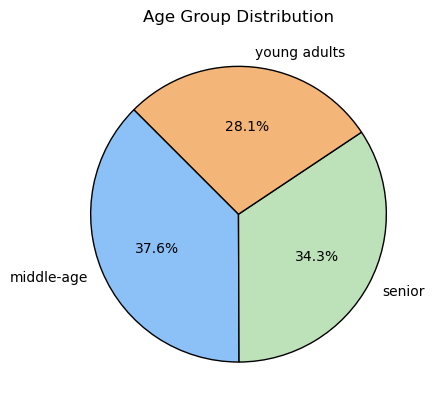

In [214]:
# Create pie chart to show age group distributions
plt.pie(age_group_count, labels = age_group_count.index, autopct='%1.1f%%', startangle=135, colors=['#8BC1F7', '#BDE2B9', '#F4B678'], wedgeprops={'edgecolor': 'black'})
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'agegroup_pie.png'), bbox_inches = 'tight');

In [61]:
# Create subset with just user_id and income_group, dropping duplicate user_id
df_income_group = ords_prods_merge[['user_id', 'income_group']].drop_duplicates(subset = 'user_id')

In [62]:
# Create table for value_counts of income_group
income_group_count = df_income_group['income_group'].value_counts()

In [63]:
income_group_count

income_group
low income            63160
middle-high income    48603
high income           48522
middle-low income     45924
Name: count, dtype: int64

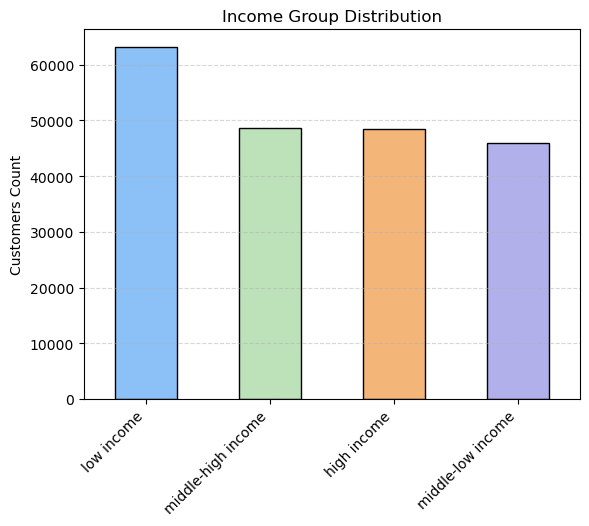

In [215]:
# Creating bar char for income_group
income_group_count.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA'], edgecolor = 'black')
plt.title('Income Group Distribution')
plt.ylabel('Customers Count')
plt.xlabel('')
plt.xticks(rotation = 45, ha = 'right') 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'incomegroup_bar.png'), bbox_inches = 'tight');

In [65]:
# Create subset with just user_id and dependants_flag, dropping duplicate user_id
df_dependants = ords_prods_merge[['user_id', 'dependants_flag']].drop_duplicates(subset = 'user_id')

In [66]:
# Create table for value_counts of dependants_flag
dependants_flag_count = df_dependants['dependants_flag'].value_counts()

In [67]:
dependants_flag_count

dependants_flag
family    154607
alone      51602
Name: count, dtype: int64

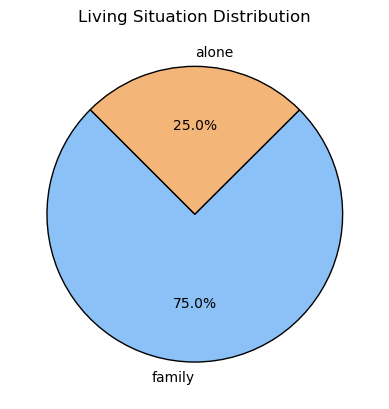

In [216]:
# Create pie chart to show dependants distributions
plt.pie(dependants_flag_count, labels = dependants_flag_count.index, autopct='%1.1f%%', startangle=135, colors=['#8BC1F7','#F4B678'], wedgeprops={'edgecolor': 'black'})
plt.title('Living Situation Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_sit_pie.png'), bbox_inches = 'tight');

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Stats for Age Group Distribution

In [69]:
# Find order_frequency statistics for each customer in age_group distribution
usage_frequency_agegroup = ords_prods_merge.groupby(['age_group', 'user_id'])['max_order'].agg(['min', 'max', 'mean'])

In [70]:
# Find order_frequency statistics for each age_group distribution
usage_agegroup_stats = usage_frequency_agegroup.groupby('age_group').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [71]:
# View usage frequency stats between age group
usage_agegroup_stats

,min,max,mean
age_group,,,
middle-age,3,99,15.649921
senior,1,99,15.574307
young adults,3,99,15.530054


In [72]:
# Assign all rows with 'prices' over 100 as nan
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [73]:
# Check if those values is replaced
ords_prods_merge['prices'].max()

25.0

In [74]:
# Find expenditure statistics for each customer in age_group distribution
exp_freq_agegroup = ords_prods_merge.groupby(['age_group', 'user_id'])['prices'].agg(['min', 'max', 'mean'])

In [75]:
# Find expenditure statistics for each age_group distribution
exp_agegroup_stats = exp_freq_agegroup.groupby('age_group').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [76]:
# View expenditure frequency stats between age group
exp_agegroup_stats

,min,max,mean
age_group,,,
middle-age,1.0,25.0,7.751988
senior,1.0,25.0,7.755305
young adults,1.0,25.0,7.749422


### Stats for Income Group Distribution

In [77]:
# Find order_frequency statistics for each customer in income_group distribution
usage_frequency_income_group = ords_prods_merge.groupby(['income_group', 'user_id'])['max_order'].agg(['min', 'max', 'mean'])

In [78]:
# Find order_frequency statistics for each income_group distribution
usage_incomegroup_stats = usage_frequency_income_group.groupby('income_group').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [79]:
# View usage frequency stats between income group
usage_incomegroup_stats

,min,max,mean
income_group,,,
high income,1,99,16.160834
low income,2,99,14.393920
middle-high income,2,99,16.008580
middle-low income,3,99,16.190010


In [80]:
# Find expenditure statistics for each customer in income_group distribution
exp_freq_income_group = ords_prods_merge.groupby(['income_group', 'user_id'])['prices'].agg(['min', 'max', 'mean'])

In [81]:
# Find expenditure statistics for each income_group distribution
exp_income_group_stats = exp_freq_income_group.groupby('income_group').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [250]:
# View expenditure frequency stats between income group
exp_income_group_stats

,min,max,mean
income_group,,,
high income,1.0,25.0,8.079865
low income,1.0,25.0,6.996981
middle-high income,1.0,25.0,8.089004
middle-low income,1.0,25.0,8.089127


### Stats for Living Situation Distribution

In [82]:
# Find order_frequency statistics for each customer in living situation distribution
usage_frequency_dependants = ords_prods_merge.groupby(['dependants_flag', 'user_id'])['max_order'].agg(['min', 'max', 'mean'])

In [83]:
# Find order_frequency statistics for each living situation distribution
usage_dep_stats = usage_frequency_dependants.groupby('dependants_flag').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [84]:
# View usage frequency stats between living situation
usage_dep_stats

,min,max,mean
dependants_flag,,,
alone,2,99,15.605325
family,1,99,15.585226


In [85]:
# Find expenditure statistics for each customer in living situation distribution
exp_freq_dep = ords_prods_merge.groupby(['dependants_flag', 'user_id'])['prices'].agg(['min', 'max', 'mean'])

In [86]:
# Find expenditure statistics for each income_group distribution
exp_dep_stats = exp_freq_dep.groupby('dependants_flag').agg({'min':'min', 'max':'max', 'mean':'mean'})

In [87]:
# View expenditure frequency stats between income group
exp_dep_stats

,min,max,mean
dependants_flag,,,
alone,1.0,25.0,7.749478
family,1.0,25.0,7.753381


## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [88]:
# Filter dataset by region to show region sales distribution
region_dist = ords_prods_merge.groupby('region')['order_id'].count()

In [89]:
# Show region sales
region_dist.sort_values(ascending = False)

region
south         10791699
west           8292777
mid_west       7597170
north_east     5722643
Name: order_id, dtype: int64

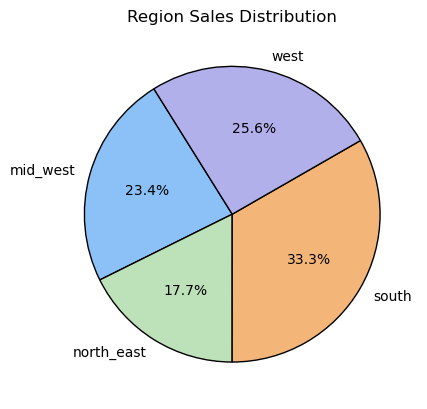

In [90]:
# Create pie chart to show region distributions
plt.pie(region_dist, labels = region_dist.index, autopct='%1.1f%%', startangle=122, colors=['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA'], wedgeprops={'edgecolor': 'black'})
plt.title('Region Sales Distribution');

In [91]:
# Seperate dataset to the 4 different region
west_ords = ords_prods_merge.loc[ords_prods_merge['region'] == 'west']
south_ords = ords_prods_merge.loc[ords_prods_merge['region'] == 'south']
mid_west_ords = ords_prods_merge.loc[ords_prods_merge['region'] == 'mid_west']
north_east_ords = ords_prods_merge.loc[ords_prods_merge['region'] == 'north_east']

In [92]:
#Filter the dataset of each region to show region top departments sales
west_ords_dept = west_ords.groupby('department_id')['order_id'].count()
south_ords_dept = south_ords.groupby('department_id')['order_id'].count()
mid_west_ords_dept = mid_west_ords.groupby('department_id')['order_id'].count()
north_east_ords_dept = north_east_ords.groupby('department_id')['order_id'].count()

In [93]:
# Filter top 5 department sales
west_ords_dept_top5 = west_ords_dept.sort_values(ascending = False).head(5)
south_ords_dept_top5 = south_ords_dept.sort_values(ascending = False).head(5)
mid_west_ords_dept_top5 = mid_west_ords_dept.sort_values(ascending = False).head(5)
north_east_ords_dept_top5 = north_east_ords_dept.sort_values(ascending = False).head(5)

In [94]:
# Show west region top 5 department
west_ords_dept_top5

department_id
4     2424964
16    1383399
19     741814
7      680191
1      571829
Name: order_id, dtype: int64

In [95]:
# Show south region top 5 department
south_ords_dept_top5

department_id
4     3160551
16    1796783
19     957346
7      898940
1      747900
Name: order_id, dtype: int64

In [96]:
# Show mid_west region top 5 department
mid_west_ords_dept_top5

department_id
4     2227937
16    1264070
19     673715
7      625574
1      524096
Name: order_id, dtype: int64

In [97]:
# Show north_east region top 5 department
north_east_ords_dept_top5

department_id
4     1665839
16     953933
19     514675
7      483418
1      390918
Name: order_id, dtype: int64

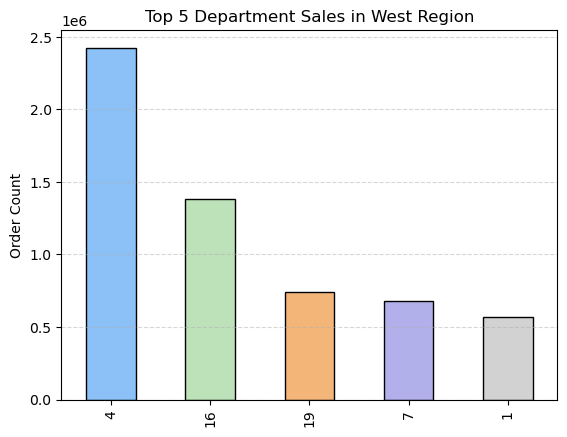

In [209]:
# Creating bar char for top 5 department sales for West
west_ords_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2' ], edgecolor = 'black')
plt.title('Top 5 Department Sales in West Region')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_west.png'), bbox_inches = 'tight');

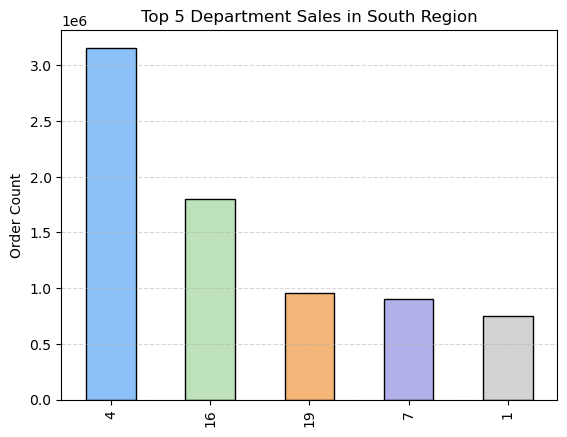

In [210]:
# Creating bar char for top 5 department sales for South
south_ords_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2' ], edgecolor = 'black')
plt.title('Top 5 Department Sales in South Region')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_south.png'), bbox_inches = 'tight');

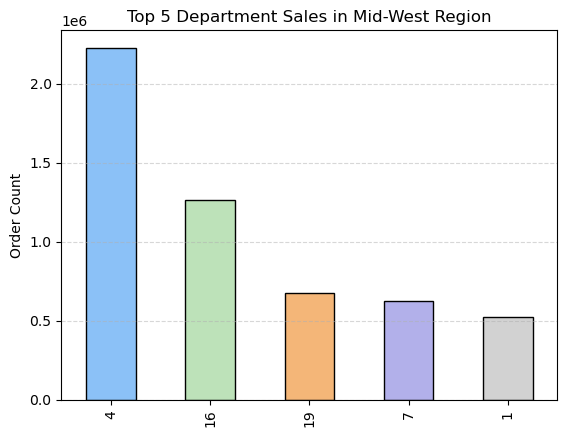

In [212]:
# Creating bar char for top 5 department sales for mid-west region
mid_west_ords_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2' ], edgecolor = 'black')
plt.title('Top 5 Department Sales in Mid-West Region')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_midwest.png'), bbox_inches = 'tight');

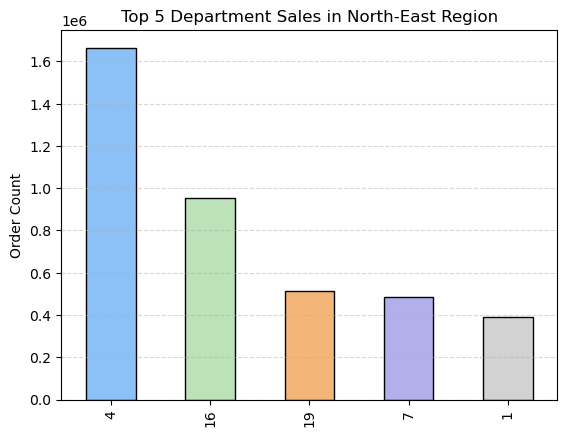

In [213]:
# Creating bar char for top 5 department sales for north-east region
north_east_ords_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2' ], edgecolor = 'black')
plt.title('Top 5 Department Sales in North-East Region')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_northeast.png'), bbox_inches = 'tight');

### Department 4 (Produce) seems to be the most popular department across all region. All regions have similar top 5 sales for the same departments.

## 9. Other Visualizations

In [107]:
# Create an price_range category - 'High-range product' if prices > 15
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range'] = 'High-range product'

In [108]:
# Create an price_range category - 'Mid-range product' is prices > 5 and <= 15
ords_prods_merge.loc[(ords_prods_merge['prices'] > 5) & (ords_prods_merge['prices'] <= 15) , 'price_range'] = 'Mid-range product'

In [109]:
# Create an price_range category - 'Low-range product' if prices <= 5
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range'] = 'Low-range product'

In [110]:
# Check total count of 'price_range' columns
ords_prods_merge['price_range'].count()

32404289

In [111]:
# Check if all values have been assigned a price_range
ords_prods_merge['price_range'].value_counts()

price_range
Mid-range product     21860852
Low-range product     10125759
High-range product      412551
nan                       5127
Name: count, dtype: int64

In [128]:
# Filter out data for prices with contain nan
price_range_ords = ords_prods_merge.loc[ords_prods_merge['price_range'] != 'nan']

In [129]:
# Check if data set only contains values that have been assigned a price_range
price_range_ords['price_range'].value_counts()

price_range
Mid-range product     21860852
Low-range product     10125759
High-range product      412551
Name: count, dtype: int64

In [130]:
# Create subset with just order_id and price_range
df_price_range = price_range_ords[['order_id', 'price_range']]

In [131]:
# Create table for value_counts of price_range
price_range_count = df_price_range['price_range'].value_counts()

In [132]:
price_range_count

price_range
Mid-range product     21860852
Low-range product     10125759
High-range product      412551
Name: count, dtype: int64

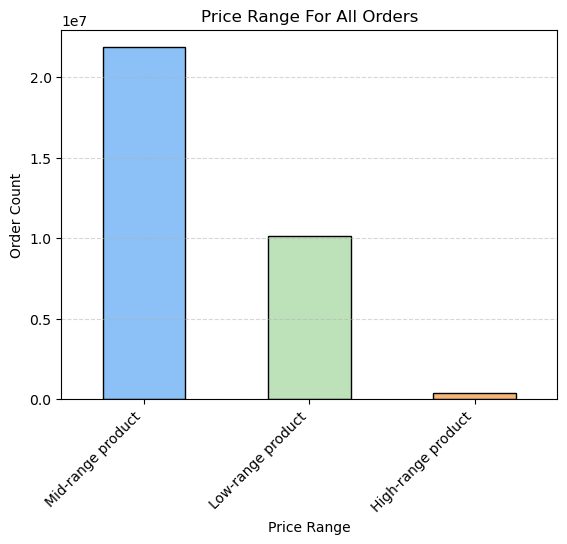

In [135]:
# Creating bar char for price range catergory for all orders
price_range_bar = price_range_count.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678'], edgecolor = 'black')
plt.title('Price Range For All Orders')
plt.ylabel('Order Count')
plt.xlabel('Price Range')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis='y', linestyle='--', alpha=0.5);

In [146]:
# Filter dataset by department to show sales distribution across department
dept_dist = ords_prods_merge.groupby('department_id')['order_id'].count().sort_values(ascending = False)

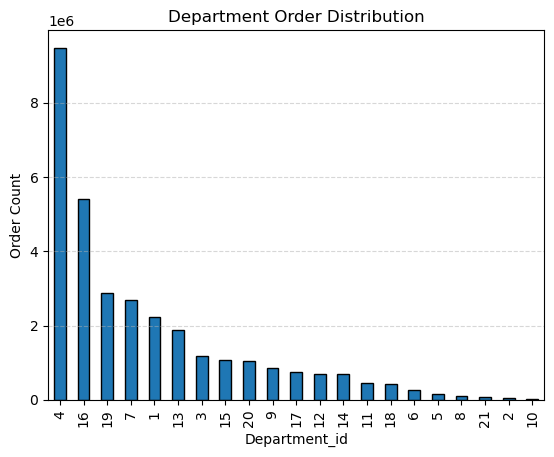

In [147]:
# Creating bar char for department order distribution for all orders
dept_order = dept_dist.plot.bar(edgecolor = 'black')
plt.title('Department Order Distribution')
plt.ylabel('Order Count')
plt.xlabel('Department_id')
plt.grid(axis='y', linestyle='--', alpha=0.5);

In [150]:
# Create subset with just user_id and loyalty_flag, dropping duplicate user_id
df_loyalty = ords_prods_merge[['user_id', 'loyalty_flag']].drop_duplicates(subset = 'user_id')

In [151]:
# Create table for value_counts of loyalty_flag
loyalty_flag_count = df_loyalty['loyalty_flag'].value_counts()

In [152]:
loyalty_flag_count

loyalty_flag
New customer        112328
Regular customer     76864
Loyal customer       17017
Name: count, dtype: int64

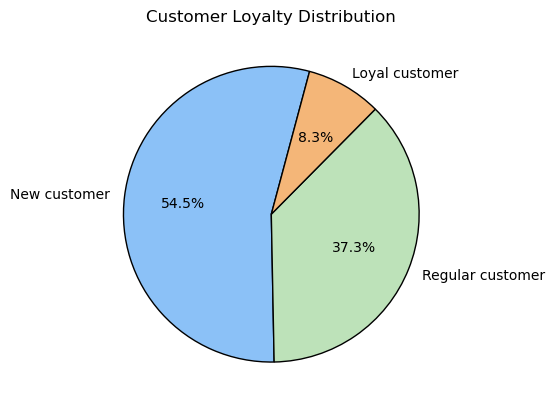

In [163]:
# Create pie chart to show age group distributions
loyalty_pie = plt.pie(loyalty_flag_count, labels = loyalty_flag_count.index, autopct='%1.1f%%', startangle=75, colors=['#8BC1F7', '#BDE2B9', '#F4B678'], wedgeprops={'edgecolor': 'black'})
plt.title('Customer Loyalty Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_pie.png'));

In [173]:
# Create subset with just loyalty_flag, department_id
df_loyalty_dept = ords_prods_merge[['loyalty_flag', 'department_id']]

In [200]:
# Seperate dataset to the 3 different loyalty_flag
loyal_dept = df_loyalty_dept.loc[df_loyalty_dept['loyalty_flag'] == 'Loyal customer'].groupby('department_id')['loyalty_flag'].count()
new_dept = df_loyalty_dept.loc[df_loyalty_dept['loyalty_flag'] == 'New customer'].groupby('department_id')['loyalty_flag'].count()
regular_dept = df_loyalty_dept.loc[df_loyalty_dept['loyalty_flag'] == 'Regular customer'].groupby('department_id')['loyalty_flag'].count()

In [201]:
# Filter top 5 department sales
loyal_dept_top5 = loyal_dept.sort_values(ascending = False).head(5)
new_dept_top5 = new_dept.sort_values(ascending = False).head(5)
regular_dept_top5 = regular_dept.sort_values(ascending = False).head(5)

In [202]:
loyal_dept_top5

department_id
4     3147376
16    1830640
19     943150
7      855017
1      609460
Name: loyalty_flag, dtype: int64

In [203]:
new_dept_top5

department_id
4     1736622
16     971457
19     534251
7      512871
1      485283
Name: loyalty_flag, dtype: int64

In [204]:
regular_dept_top5

department_id
4     4595293
16    2596088
19    1410149
7     1320235
1     1140000
Name: loyalty_flag, dtype: int64

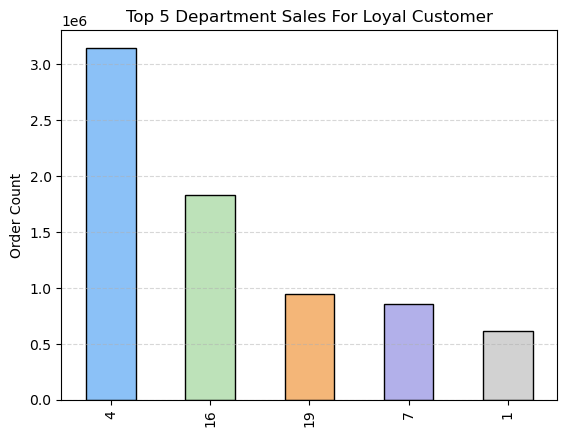

In [205]:
# Creating bar char for top 5 department sales for loyal customer
loyal_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2'], edgecolor = 'black')
plt.title('Top 5 Department Sales For Loyal Customer')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_loyal.png'), bbox_inches = 'tight');

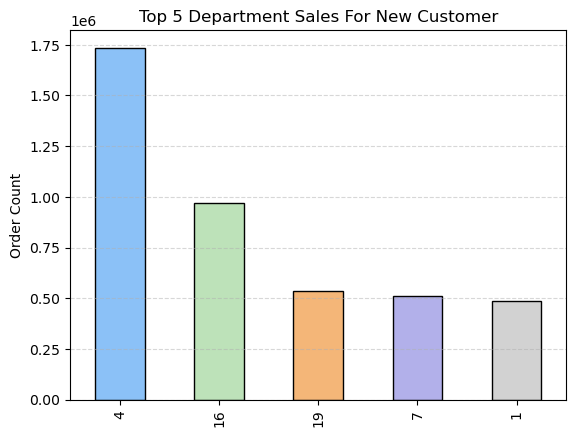

In [207]:
# Creating bar char for top 5 department sales for New customer
new_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2'], edgecolor = 'black')
plt.title('Top 5 Department Sales For New Customer')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_new.png'), bbox_inches = 'tight');

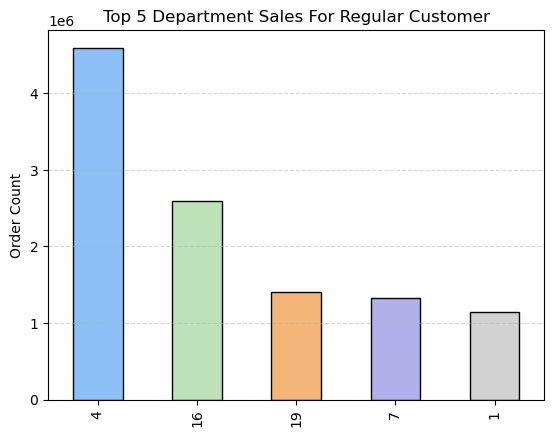

In [208]:
# Creating bar char for top 5 department sales for Regular customer
regular_dept_top5.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678','#B2B0EA', '#D2D2D2'], edgecolor = 'black')
plt.title('Top 5 Department Sales For Regular Customer')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_regular.png'), bbox_inches = 'tight');

In [217]:
# Filter out data for prices with contain 'yes' for produce_flag (department 4)
produce_ords = ords_prods_merge.loc[ords_prods_merge['produce_flag'] == 'yes']

In [221]:
# Create 3 subset with just age_group, income_group, dependants_flag and produce_flag
age_produce = produce_ords[['age_group', 'produce_flag']]
income_produce = produce_ords[['income_group', 'produce_flag']]
dependants_produce = produce_ords[['dependants_flag', 'produce_flag']]

In [222]:
age_produce.head()

,age_group,produce_flag
63885,young adults,yes
63886,young adults,yes
63887,senior,yes
63888,middle-age,yes
63889,senior,yes


In [232]:
# Group the data based on the category flag(agegroup, income_group, dependants_flag)
age_produce_count = age_produce.groupby('age_group')['produce_flag'].count()
income_produce_count = income_produce.groupby('income_group')['produce_flag'].count()
dependants_produce_count = dependants_produce.groupby('dependants_flag')['produce_flag'].count()

In [233]:
age_produce_count

age_group
middle-age      3570047
senior          3240599
young adults    2668645
Name: produce_flag, dtype: int64

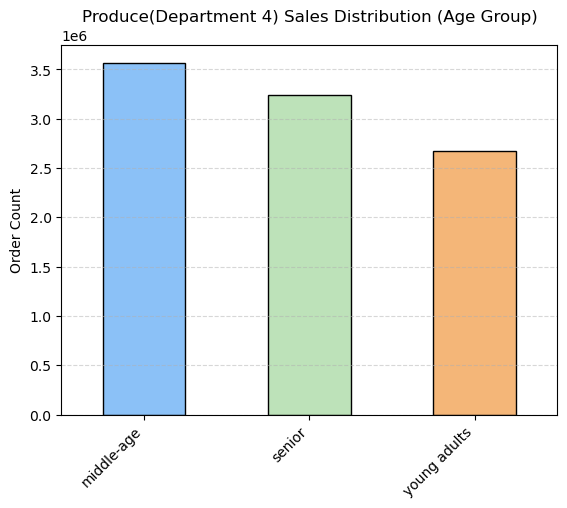

In [235]:
# Creating bar char for produce sales for different age group
age_produce_count.plot.bar(color = ['#8BC1F7', '#BDE2B9', '#F4B678'], edgecolor = 'black')
plt.title('Produce(Department 4) Sales Distribution (Age Group)')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept4_agegroup.png'), bbox_inches = 'tight');

In [237]:
income_produce_count

income_group
high income           2445058
low income            2213704
middle-high income    2462259
middle-low income     2358270
Name: produce_flag, dtype: int64

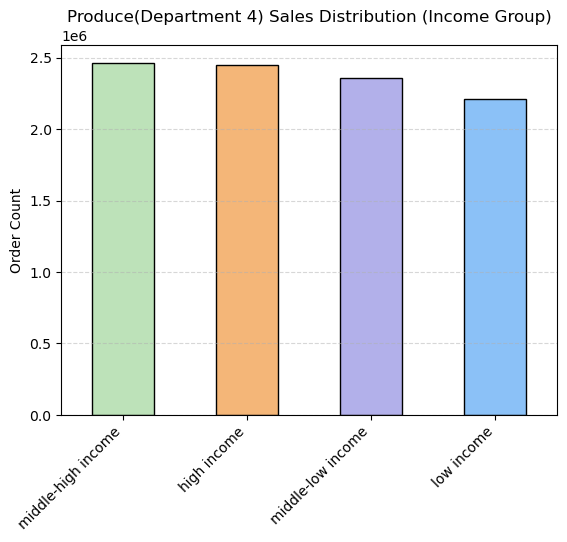

In [239]:
# Creating bar char for produce sales for different age group
income_produce_count.sort_values(ascending = False).plot.bar(color = ['#BDE2B9', '#F4B678','#B2B0EA','#8BC1F7'], edgecolor = 'black')
plt.title('Produce(Department 4) Sales Distribution (Income Group)')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept4_incomegroup.png'), bbox_inches = 'tight');

In [240]:
dependants_produce_count

dependants_flag
alone     2375445
family    7103846
Name: produce_flag, dtype: int64

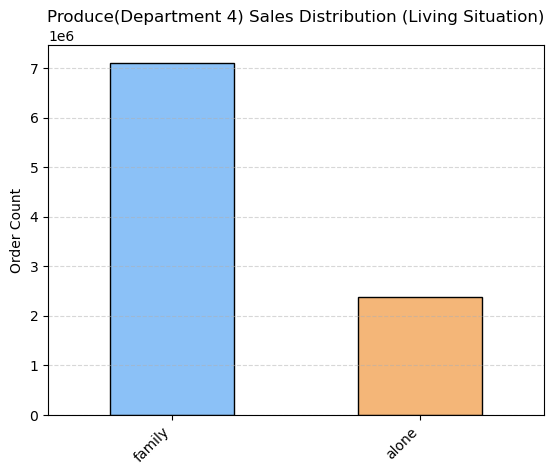

In [241]:
# Creating bar char for produce sales for different age group
dependants_produce_count.sort_values(ascending = False).plot.bar(color = ['#8BC1F7', '#F4B678'], edgecolor = 'black')
plt.title('Produce(Department 4) Sales Distribution (Living Situation)')
plt.ylabel('Order Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept4_fam.png'), bbox_inches = 'tight');

In [259]:
ords_prods_merge.shape

(32404289, 36)

In [260]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_day_of_week       int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  busiest_day             object 
 14  busiest_day_new         object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  avg_spending            float64
 19  Spender_status          object 
 20  median_order_days       float64
 21  order_frequency         objec

## 10. Export

In [140]:
# Exporting price_range bar chart as .png image
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_barchart.png'), bbox_inches = 'tight')

In [159]:
# Exporting price_range bar chart as .png image
dept_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_order_barchart.png'), bbox_inches = 'tight')